In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 特征衍生

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,3324,8333,0.01,0.89,3500,1.03,1.00,0.566,23.0,12.0,...,6200.0,2428.0,10900.0,79.0,6.0,7.0,16800.0,7933.0,10.0,41.0
1,75,198,0.00,1.00,0,0.85,1.00,0.436,18.0,27.0,...,4100.0,1541.0,7700.0,75.0,7.0,7.0,13200.0,6785.0,7.0,53.0
2,871,2191,0.13,0.71,0,3.59,0.64,0.416,19.0,22.0,...,2300.0,1387.0,7900.0,79.0,7.0,8.0,14400.0,4914.0,11.0,1.0
3,2916,7300,0.01,0.99,1000,1.03,0.91,0.051,10.0,87.0,...,4700.0,2900.0,3000.0,65.0,1.0,1.0,3000.0,3000.0,23.0,190.0
4,1255,3273,0.02,0.93,1500,0.70,0.50,0.425,21.0,11.0,...,2600.0,1816.0,13500.0,77.0,5.0,5.0,20400.0,8700.0,12.0,90.0


In [4]:
# 这里 1 表示的是列
data.drop(['Unnamed: 0','Unnamed: 0.1'],axis =1,inplace = True)

In [5]:
data.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.01,0.89,3500,1.03,1.00,0.566,23.0,12.0,30.0,2.0,...,6200.0,2428.0,10900.0,79.0,6.0,7.0,16800.0,7933.0,10.0,41.0
1,0.00,1.00,0,0.85,1.00,0.436,18.0,27.0,16.0,3.0,...,4100.0,1541.0,7700.0,75.0,7.0,7.0,13200.0,6785.0,7.0,53.0
2,0.13,0.71,0,3.59,0.64,0.416,19.0,22.0,17.0,4.0,...,2300.0,1387.0,7900.0,79.0,7.0,8.0,14400.0,4914.0,11.0,1.0
3,0.01,0.99,1000,1.03,0.91,0.051,10.0,87.0,38.0,3.0,...,4700.0,2900.0,3000.0,65.0,1.0,1.0,3000.0,3000.0,23.0,190.0
4,0.02,0.93,1500,0.70,0.50,0.425,21.0,11.0,14.0,4.0,...,2600.0,1816.0,13500.0,77.0,5.0,5.0,20400.0,8700.0,12.0,90.0


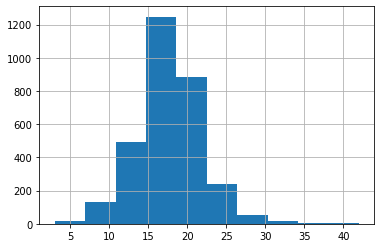

In [6]:
# 通过 hist 方法 可以选取一列画出直方图
data['transd_mcc'].hist()

注意到数据中有三列['latest_one_month_loan','latest_three_month_loan','latest_six_month_loan']为累计值，我分别将其替换成一段时间内的平均值。同理有三列特征['latest_one_month_apply','latest_three_month_apply','latest_six_month_apply'].

In [7]:
data['avg_one_month_loan'] = data['latest_one_month_loan']
data['avg_three_month_loan'] = data['latest_three_month_loan']/3
data['avg_six_month_loan'] = data['latest_six_month_loan']/6
data['avg_one_month_apply'] = data['latest_one_month_apply']
data['avg_three_month_apply'] = data['latest_three_month_apply']/3
data['avg_six_month_apply'] = data['latest_six_month_apply']/6

In [8]:
data.drop(['latest_one_month_loan','latest_three_month_loan','latest_six_month_loan','latest_one_month_apply','latest_three_month_apply','latest_six_month_apply'],axis = 1,inplace = True)

In [9]:
data['first_transaction_time'].min()

20110101.0

发现第一次交易时间均在2011年之后，故对于特征['number_of_trans_from_2011','historical_trans_amount','historical_trans_day']同样用平均数表示每单平均交易量、每天平均交易量。

In [10]:
data['avg_amount_once'] = data['historical_trans_amount']/data['number_of_trans_from_2011']
data['avg_amount_perday'] = data['historical_trans_amount']/data['historical_trans_day']

In [11]:
data.drop(['number_of_trans_from_2011','historical_trans_day'],axis = 1,inplace = True) 

对于['history_suc_fee','history_fail_fee','latest_one_month_suc','latest_one_month_fail']来说，可能成功和失败的次数没有很大的意义，我们将其转换为成功、失败率。

In [12]:
data['history_suc_rate'] = data['history_suc_fee']/(data['history_suc_fee']+data['history_fail_fee'])
data['latest_one_month_suc_rate'] = data['latest_one_month_suc']/(data['latest_one_month_fail']+data['latest_one_month_suc'])

In [13]:
data.fillna(0,inplace=True)  # 近一个月成功率处由于有部分数据成功数和失败数均为0计算后变为了nan

In [14]:
data.drop(['history_suc_fee','history_fail_fee','latest_one_month_suc','latest_one_month_fail'],axis = 1,inplace=True)

还有一些看不懂的column标签，在这里就先不处理了。

In [15]:
data.drop(['latest_query_time','loans_latest_time'],axis = 1,inplace = True)  # 与latest_query_day，loans_latest_day体现相同信息

In [16]:
len(data.columns)  # 仍有80个特征

80

# 特征选择

## 查找关联

在此之前对数值类型特征进行数据标准化,类别类型特征保持原样

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
data_cat = data[['regional_mobility','student_feature','is_high_user','reg_preference_for_trad','status']]

In [19]:
scaler = StandardScaler()

In [20]:
data_num_ori = data.drop(['regional_mobility','student_feature','is_high_user','reg_preference_for_trad','status'],axis = 1)
print(data_num_ori.shape)

(3095, 75)


In [21]:
scaler.fit(data_num_ori)
data_num = scaler.transform(data_num_ori)

In [22]:
data_num = pd.DataFrame(data_num)
# concat 的作用是列表的拼接，axis 参数为 1：横向拼接，axis 参数为 0：纵向拼接
# 拼接的目的是避免在标准化的过程中将一些不需要标准化的数据进行标准化操作
data_prepared = pd.concat([data_num,data_cat],axis = 1)

查看关联度（线性）

In [23]:
corr_matrix = data_prepared.corr()

In [24]:
corr_matrix['status'].sort_values(ascending = False)

status    1.000000
24        0.331591
46        0.286010
12        0.143282
25        0.121601
            ...   
62       -0.085885
74       -0.218445
36       -0.253214
42       -0.266039
73       -0.394570
Name: status, Length: 80, dtype: float64

## IV值特征选择

In [25]:
def CalcIV(Xvar,Yvar):
    N_0=np.sum(Yvar==0)
    N_1=np.sum(Yvar==1)
    N_0_group=np.zeros(np.unique(Xvar).shape)
    
    N_1_group=np.zeros(np.unique(Xvar).shape)
    print(N_0_group.shape)
    for i in range(len(np.unique(Xvar))):
        N_0_group[i] = Yvar[(Xvar==np.unique(Xvar)[i])&(Yvar==0)].count()
        N_1_group[i] = Yvar[(Xvar==np.unique(Xvar)[i])&(Yvar==1)].count()
    iv = np.sum((N_0_group/N_0-N_1_group/N_1)*np.log((N_0_group/N_0)/(N_1_group/N_1)))
    if iv>=1.0:## 处理极端值
        iv=1
    return iv

def caliv_batch(df,Yvar):
    ivlist=[]
    for col in df.columns:
        iv=CalcIV(df[col],Yvar)
        ivlist.append(iv)
    names=list(df.columns)
    iv_df=pd.DataFrame({'Var':names,'Iv':ivlist},columns=['Var','Iv'])

    return iv_df,ivlist
im_iv, ivl = caliv_batch(data_prepared.iloc[:,:-1],data_prepared.iloc[:,-1])
print(im_iv)

(37,)
(88,)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


(142,)
(615,)
(82,)
(472,)
(38,)
(132,)
(103,)
(1905,)
(1440,)
(3000,)
(20,)
(2513,)
(12,)
(1363,)
(8,)
(292,)
(21,)
(28,)
(89,)
(28,)
(89,)
(18,)
(15,)
(24,)
(26,)
(1352,)
(721,)
(26,)
(7,)
(481,)
(2067,)
(8,)
(1440,)
(108,)
(197,)
(40,)
(43,)
(23,)
(17,)
(70,)
(242,)
(23,)
(129,)
(116,)
(24,)
(41,)
(19,)
(31,)
(183,)
(52,)
(30,)
(31,)
(32,)
(88,)
(830,)
(302,)
(23,)
(19,)
(20,)
(160,)
(1344,)
(192,)
(221,)
(13,)
(26,)
(63,)
(35,)
(55,)
(63,)
(3077,)
(3091,)
(1268,)
(78,)
(5,)
(3,)
(2,)
(5,)
                        Var        Iv
0                         0  1.000000
1                         1  1.000000
2                         2  1.000000
3                         3  1.000000
4                         4  1.000000
..                      ...       ...
74                       74  1.000000
75        regional_mobility  0.015966
76          student_feature  1.000000
77             is_high_user  0.002525
78  reg_preference_for_trad  0.004019

[79 rows x 2 columns]


In [26]:
im_iv['Iv'].describe()

count    79.000000
mean      0.939570
std       0.234326
min       0.002525
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Iv, dtype: float64

In [27]:
threshold = 0.02
threshold2 = 0.6
data_index=[]
for i in range(len(ivl)):
    if (im_iv['Iv'][i]< threshold)|(im_iv['Iv'][i] > threshold2):
        data_index.append(im_iv['Var'][i])
datafinal_IV = data_prepared.drop(data_index,axis=1)

In [28]:
datafinal_IV.columns  #删去了接近80个特征，怎么那么多？？？

Index([12, 16, 'status'], dtype='object')

In [29]:
data_num_ori.columns[[12,16,74]]

Index(['rank_trad_1_month', 'top_trans_count_last_1_month',
       'latest_one_month_suc_rate'],
      dtype='object')

In [30]:
x_train_IV = datafinal_IV.iloc[:,:-1]
y_train_IV = datafinal_IV.iloc[:,-1]

In [31]:
x_train_IV.to_csv(r'x_train_IV.csv',index=False)
y_train_IV.to_csv(r'y_train.csv',index = False,header = True)

## 随机森林选择特征

In [32]:
from sklearn.ensemble import RandomForestClassifier
x_train = data_prepared.iloc[:,:-1]
y_train = data_prepared.iloc[:,-1]
feat_lables = x_train.columns
forest = RandomForestClassifier(n_estimators=10000, random_state=0,n_jobs=1)
forest.fit(x_train, y_train)
importance = forest.feature_importances_
imp_result = np.argsort(importance)[::-1]

for i in range(x_train.shape[1]):
    print("%2d. %-*s %f"%(i+1, 30, feat_lables[i], importance[imp_result[i]]))


 1. 0                              0.069169
 2. 1                              0.046663
 3. 2                              0.039846
 4. 3                              0.034510
 5. 4                              0.025588
 6. 5                              0.020397
 7. 6                              0.016309
 8. 7                              0.016308
 9. 8                              0.015939
10. 9                              0.015866
11. 10                             0.015363
12. 11                             0.015254
13. 12                             0.015223
14. 13                             0.015167
15. 14                             0.015091
16. 15                             0.015012
17. 16                             0.014884
18. 17                             0.014876
19. 18                             0.014707
20. 19                             0.014605
21. 20                             0.014311
22. 21                             0.014178
23. 22                          

In [33]:
threshold = 0.01
data_index = list(x_train.columns[ importance < threshold])
x_train_rf = x_train.drop(data_index,axis=1)
x_train_rf.shape

(3095, 49)

剩下了49个特征

In [34]:
data_num_ori.columns[list(x_train_rf.columns)]

Index(['middle_volume_percent', 'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'repayment_capability', 'first_transaction_time',
       'historical_trans_amount', 'rank_trad_1_month', 'trans_amount_3_month',
       'abs', 'avg_price_last_12_month', 'trans_top_time_last_1_month',
       'trans_top_time_last_6_month', 'consume_top_time_last_1_month',
       'consume_top_time_last_6_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'max_cumulative_consume_later_1_month',
       'pawns_auctions_trusts_consume_last_6_month', 'first_transaction_day',
       'trans_day_last_12_month', 'apply_score', 'apply_credibility',
       'query_sum_count', 'loans_score', 'loans_count', 'loans_settle_count',
       'loans_overdue_c

In [35]:

x_train_rf.to_csv(r'x_train_rf.csv',index = False)